## Productionisation of Machine Learning Models (Model Serialization)

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

from pickle import dump

In [2]:
data = pd.read_csv('resources/data/heart-disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.shape

(303, 14)

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df = data.copy()

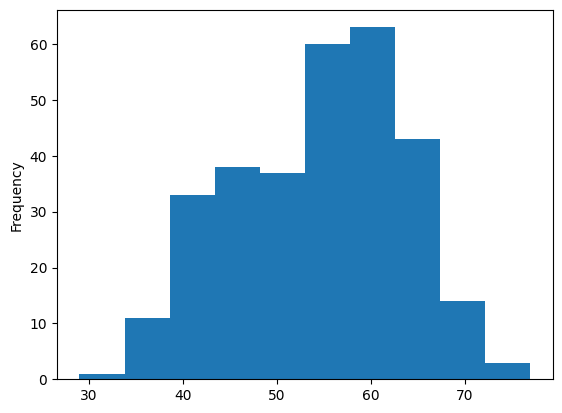

In [6]:
df.age.plot(kind='hist');

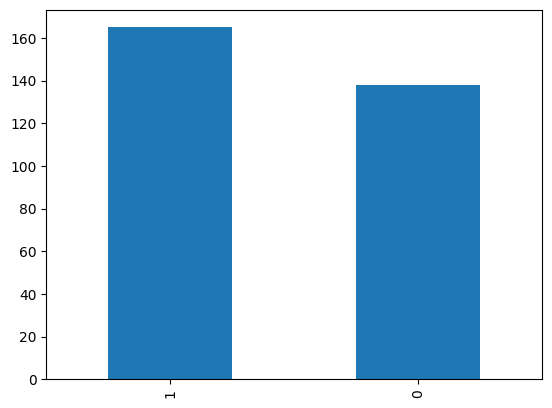

In [8]:
df.target.value_counts().plot(kind='bar');

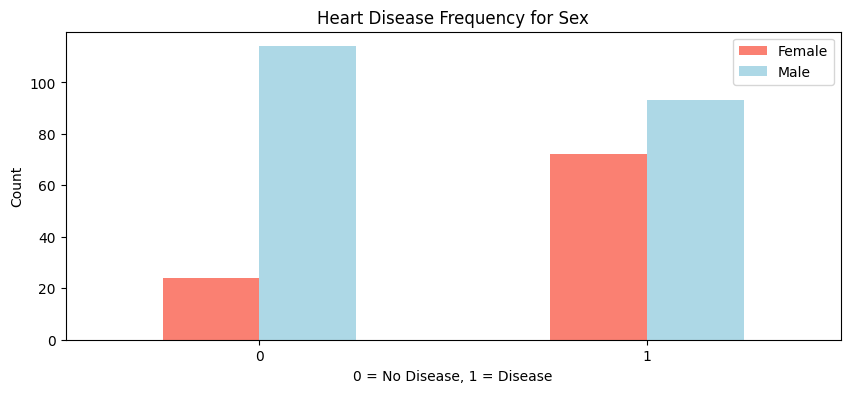

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 4),
                                   color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

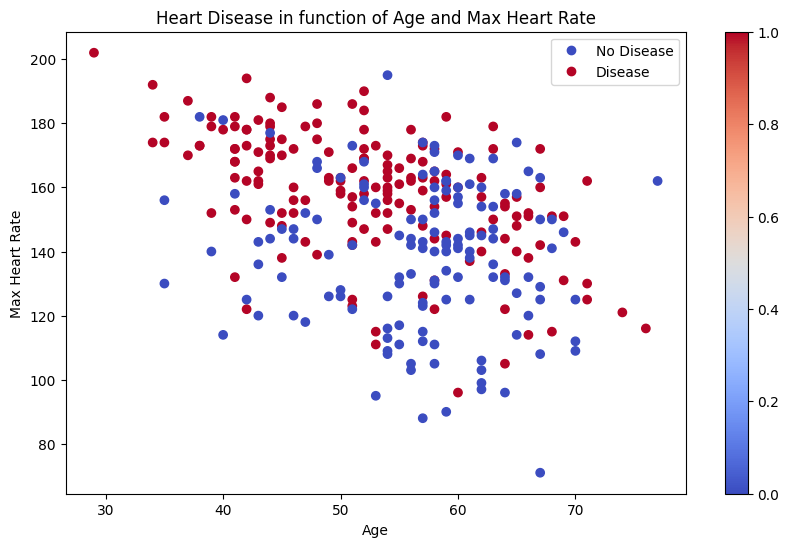

In [15]:
plt.figure(figsize=(10, 6))
# Scatter plot with both positive and negative examples
scatter = plt.scatter(df.age, df.thalach, c=df.target, cmap='coolwarm')
# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.colorbar(scatter)
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Disease']);

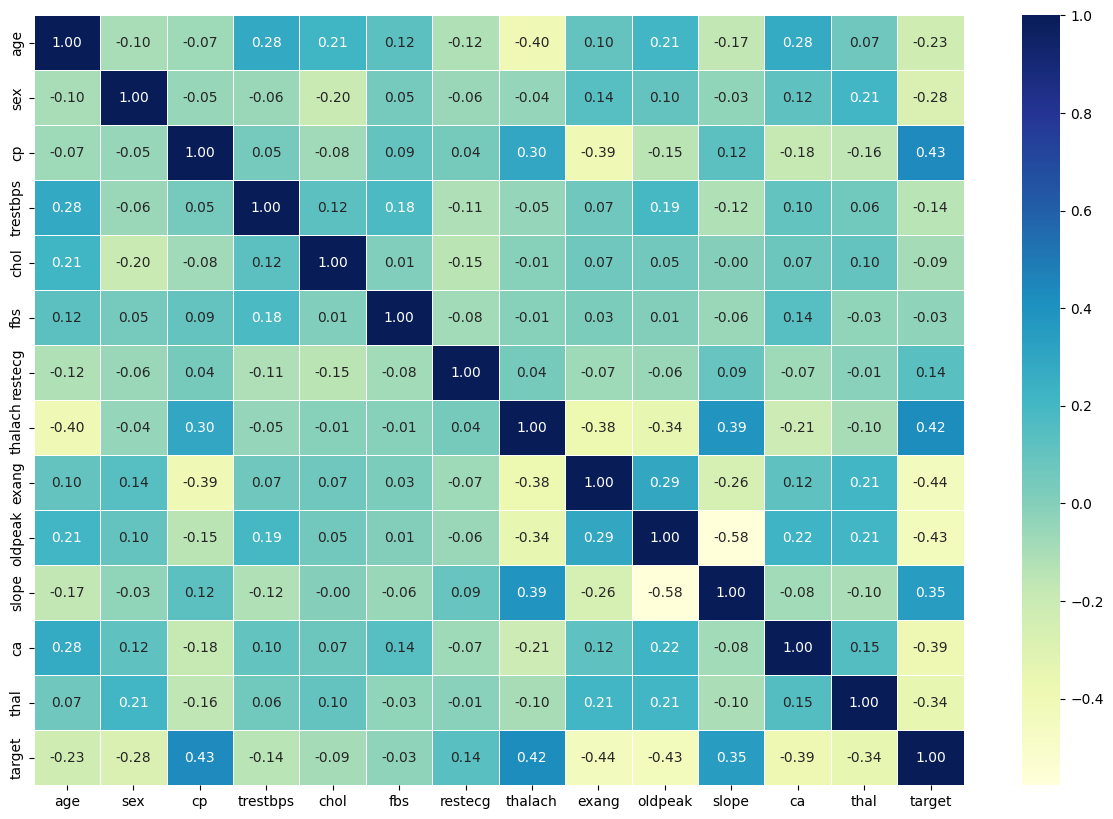

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [17]:
# Split data into x and y
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25)

In [18]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

#StandardScaler object
scaler = StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)

X_train_rescaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,-0.399214,0.695457,1.007936,-2.246059,-0.376853,-0.390236,0.937129,0.148220,1.482290,-0.856128,0.948928,0.273634,1.137929
273,0.393725,0.695457,-0.922878,-1.887342,-0.247769,-0.390236,0.937129,0.239773,-0.674632,-0.771003,0.948928,0.273634,1.137929
197,1.413217,0.695457,-0.922878,-0.392692,0.121041,2.562551,0.937129,0.560210,-0.674632,-0.685877,-0.682941,1.259584,1.137929
14,0.393725,-1.437904,1.973343,1.101959,0.655817,2.562551,-0.996765,0.514433,-0.674632,-0.004875,0.948928,-0.712317,-0.517903
269,0.167171,0.695457,-0.922878,-0.093761,0.655817,2.562551,-0.996765,-2.186391,1.482290,0.505877,-2.314810,-0.712317,1.137929


In [19]:
scaler.var_, scaler.scale_

(array([7.79322323e+01, 2.19720934e-01, 1.07294921e+00, 2.79769567e+02,
        2.94071288e+03, 1.14692697e-01, 2.67383415e-01, 4.77212133e+02,
        2.14946923e-01, 1.38001126e+00, 3.75516699e-01, 1.02870228e+00,
        3.64726659e-01]),
 array([ 8.82792344,  0.468744  ,  1.03583262, 16.7263136 , 54.22834019,
         0.3386631 ,  0.5170913 , 21.84518558,  0.46362369,  1.1747388 ,
         0.61279417,  1.01424962,  0.60392604]))

In [20]:
# Scale the X_test
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns = X_test.columns,
                               index = X_test.index)

X_test_rescaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
223,0.167171,-1.437904,-0.922878,4.091261,0.748020,2.562551,-0.996765,-0.813091,1.482290,2.548884,-2.314810,1.259584,1.137929
63,-1.531983,0.695457,0.042529,0.205169,-0.819426,-0.390236,0.937129,-0.858867,-0.674632,-0.856128,-0.682941,-0.712317,-2.173735
80,-1.531983,0.695457,1.007936,-1.169910,0.047279,-0.390236,0.937129,1.292637,-0.674632,-0.856128,0.948928,-0.712317,-0.517903
163,-1.871814,0.695457,1.007936,0.384527,-1.335761,-0.390236,0.937129,1.017976,-0.674632,-0.856128,0.948928,3.231486,-0.517903
248,-0.059383,0.695457,0.042529,3.612973,0.655817,-0.390236,-0.996765,2.025063,-0.674632,-0.856128,0.948928,0.273634,1.137929


## Modeling

For this project, we will be employing the following machine learning algorithms:


* K-Nearest Neighbors (KNN)
* Logistic Regression
* Random Forest
* Gaussian Naive Bayes (GaussianNB)
* Decision Tree
* Support Vector Machines (SVM)

We have chosen these algorithms because they are widely used for classification tasks and are known to perform well on a variety of datasets. `Random Forest` is an ensemble learning method that combines multiple decision trees to make predictions, while `Logistic Regression` is a linear model that is commonly used for binary classification tasks. `SVMs` are another popular algorithm that works by finding the best hyperplane to separate the data into different classes. `KNN` is a non-parametric algorithm that makes predictions based on the nearest neighbors of a given data point, while `GaussianNB` is a probabilistic algorithm that makes predictions based on Bayes' theorem. Finally, `Decision Tree` is another algorithm that uses a tree-like model of decisions and their possible consequences.

In [21]:
## KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_rescaled, y_train)

KNeighborsClassifier()

In [22]:
y_test_pred = knn_classifier.predict(X_test_rescaled)

In [24]:
knn_acc = accuracy_score(y_test, y_test_pred)
knn_acc

0.868421052631579

In [25]:
## Logistic Reg Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_rescaled, y_train)

LogisticRegression()

In [26]:
y_test_pred = lr_classifier.predict(X_test_rescaled)
lr_acc = accuracy_score(y_test, y_test_pred)
lr_acc

0.8947368421052632

In [27]:
## Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_rescaled, y_train)

RandomForestClassifier()

In [28]:
y_test_pred = rf_classifier.predict(X_test_rescaled)
rf_acc = accuracy_score(y_test, y_test_pred)
rf_acc

0.8947368421052632

In [29]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_rescaled, y_train)

GaussianNB()

In [30]:
y_test_pred = nb_classifier.predict(X_test_rescaled)
nb_acc = accuracy_score(y_test, y_test_pred)
nb_acc

0.881578947368421

In [31]:
dt_classifier = DecisionTreeClassifier(max_depth = 3)
dt_classifier.fit(X_train_rescaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
y_test_pred = dt_classifier.predict(X_test_rescaled)
dt_acc = accuracy_score(y_test, y_test_pred)
dt_acc

0.8026315789473685

In [33]:
sv_classifier = SVC()
sv_classifier.fit(X_train_rescaled, y_train)

SVC()

In [34]:
y_test_pred = sv_classifier.predict(X_test_rescaled)
sv_acc = accuracy_score(y_test, y_test_pred)
sv_acc

0.881578947368421

## Save the Models (Serialization)

In [35]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))
dump(knn_classifier, open('models/knn_model.pkl', 'wb'))
dump(lr_classifier, open('models/lr_model.pkl', 'wb'))
dump(rf_classifier, open('models/rf_model.pkl', 'wb'))
dump(nb_classifier, open('models/nb_model.pkl', 'wb'))
dump(dt_classifier, open('models/dt_model.pkl', 'wb'))
dump(sv_classifier, open('models/sv_model.pkl', 'wb'))

In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


After training and evaluating our six machine learning models, and saved them all,  Gaussian Naive Bayes (GaussianNB) and Logistic Regression models showed the highest accuracy with 89%. However, we noticed that the file size of the saved GaussianNB model is much smaller (2KB) compared to the Logistic Regression model (614KB). This is because the GaussianNB model is a probabilistic model that uses Bayes' theorem to make predictions based on the probability distribution of the features, whereas the Logistic Regression model is a linear model that requires the computation and storage of the coefficients for each feature. Therefore, the GaussianNB model is simpler and more lightweight, making it a good choice for applications with limited storage or computing resources. Thus, we have decided to use Gaussian Naive Bayes (GaussianNB) algorithm for our heart disease app.